In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="3"

Found 320 files belonging to 4 classes.
Using 256 files for training.
Found 320 files belonging to 4 classes.
Using 64 files for validation.
['blotch', 'normal', 'rot', 'scab']
0.0 0.99992657
Epoch 1/100


2022-03-06 21:37:24.589943: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.27GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-03-06 21:37:24.688689: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-03-06 21:37:24.865296: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-03-06 21:37:24.927753: W tensorflow/core/common_runtime/bfc_allocato

4/4 [==============================] - 4s 518ms/step - loss: 1.3966 - accuracy: 0.2539 - val_loss: 1.3780 - val_accuracy: 0.2656
Epoch 2/100
4/4 [==============================] - 2s 455ms/step - loss: 1.3618 - accuracy: 0.2695 - val_loss: 1.3168 - val_accuracy: 0.4375
Epoch 3/100
4/4 [==============================] - 2s 455ms/step - loss: 1.2583 - accuracy: 0.4180 - val_loss: 1.0780 - val_accuracy: 0.5312
Epoch 4/100
4/4 [==============================] - 2s 452ms/step - loss: 1.1522 - accuracy: 0.4258 - val_loss: 1.1103 - val_accuracy: 0.5938
Epoch 5/100
4/4 [==============================] - 2s 455ms/step - loss: 1.0610 - accuracy: 0.4688 - val_loss: 1.0199 - val_accuracy: 0.4688
Epoch 6/100
4/4 [==============================] - 2s 454ms/step - loss: 1.0198 - accuracy: 0.5156 - val_loss: 0.9653 - val_accuracy: 0.5469
Epoch 7/100
4/4 [==============================] - 2s 453ms/step - loss: 0.9882 - accuracy: 0.5039 - val_loss: 0.9205 - val_accuracy: 0.6094
Epoch 8/100
4/4 [========

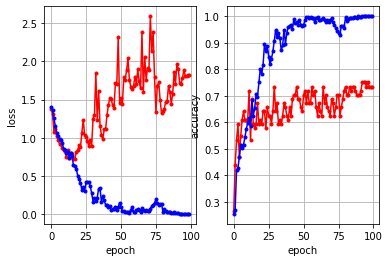

In [13]:

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"]="3"
import tensorflow as tf
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten,Activation,Dropout

img_height, img_width = [256, 256]
batch_size = 64

data_dir = './images/'
data_dir = pathlib.Path(data_dir)
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)

##train_ds = tf.keras.utils.image_dataset_froma_directory(data_dir, validation_split=0.2, subset="training", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
##val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 4



model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(64, 4, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4)
])



# model.add(tf.keras.layers.Dense(32, activation='sigmoid'))

# model = tf.keras.Sequential([
#   tf.keras.layers.Rescaling(1./255),
#   tf.keras.layers.Conv2D(128, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(128, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(128, 3, activation='relu'),
#   tf.keras.layers.Dropout(.2),
#   tf.keras.layers.MaxPooling2D(),


#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(num_classes)
# ])

model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs=100)

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(len(y_vloss)), y_vloss, marker='.', c='red')
ax1.plot(np.arange(len(y_loss)), y_loss, marker='.', c='blue')
ax1.grid()
plt.setp(ax1, xlabel='epoch', ylabel='loss')

ax2.plot(np.arange(len(y_vacc)), y_vacc, marker='.', c='red')
ax2.plot(np.arange(len(y_acc)), y_acc, marker='.', c='blue')
ax2.grid()
plt.setp(ax2, xlabel='epoch', ylabel='accuracy')

plt.show()
